✅ ogrenciler.csv okundu (encoding=utf-8, sep=';')
✅ kayitlar.csv okundu (encoding=utf-8, sep=';')
✅ odemeler.csv okundu (encoding=utf-8, sep=';')

📌 ogrenciler kolonlar: ['ogrenci_id', 'yas', 'sehir', 'kayit_tarihi']
📌 kayitlar kolonlar: ['kayit_id', 'ogrenci_id', 'kurs_adi', 'seviye', 'baslangic_tarihi', 'tamamlandi', 'tamamlama_orani', 'ayrilma_nedeni']
📌 odemeler kolonlar: ['odeme_id', 'ogrenci_id', 'kurs_adi', 'liste_fiyati', 'indirim', 'odenen_tutar', 'odeme_tarihi', 'odeme_yontemi']


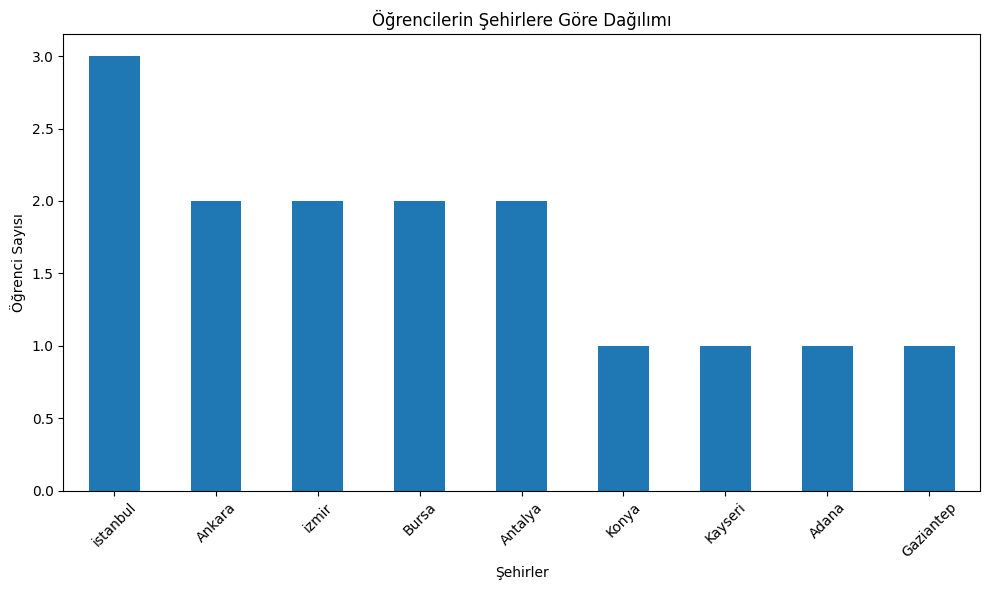


🏆 En çok kayıt olan şehir: istanbul (3 kayıt)


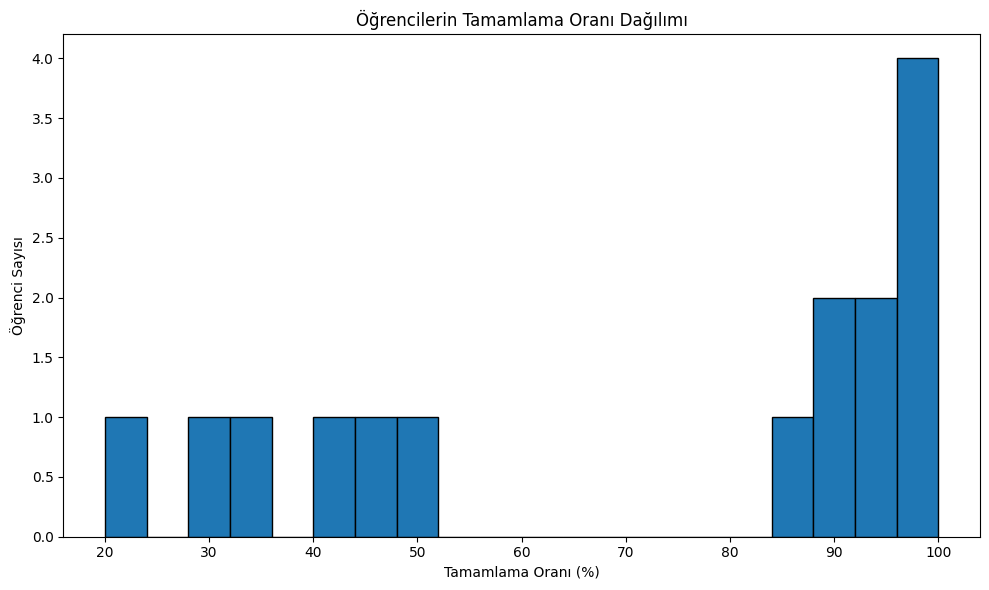

📊 Ortalama tamamlama oranı: 71.33

📌 Ödeme durumu örnekleri:
   odenen_tutar odeme_durumu
0          1500       Ödendi
1          1300       Ödendi
2          1800       Ödendi
3          1700       Ödendi
4          1300       Ödendi


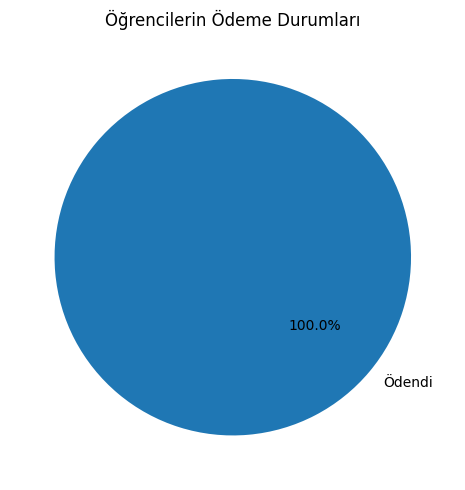


💰 Ödeme Durumları:
- Ödendi: 15 öğrenci (%100.00)
Analiz başlıyor...


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import kurslar


# 1) CSV okuma: hem encoding hem de ayraç (;) sorunlarına dayanıklı
def oku_csv(dosya, sep=";"):
    for enc in ["utf-8", "utf-8-sig", "cp1254", "iso-8859-9", "latin5"]:
        try:
            df = pd.read_csv(dosya, encoding=enc, sep=sep)
            # sütun isimlerinde baş/son boşluk varsa temizle
            df.columns = df.columns.str.strip()
            print(f"✅ {dosya} okundu (encoding={enc}, sep='{sep}')")
            return df
        except UnicodeDecodeError:
            continue
    raise Exception(f"❌ {dosya} okunamadı. Encoding sorunu olabilir.")

# 2) Dosyaları oku
ogrenciler = oku_csv("ogrenciler.csv")
kayitlar   = oku_csv("kayitlar.csv")
odemeler   = oku_csv("odemeler.csv")

# 3) Kolonları yazdır (kontrol)
print("\n📌 ogrenciler kolonlar:", ogrenciler.columns.tolist())
print("📌 kayitlar kolonlar:", kayitlar.columns.tolist())
print("📌 odemeler kolonlar:", odemeler.columns.tolist())

# -------------------------------------------------------
# A) Şehirlere göre öğrenci sayısı
# -------------------------------------------------------
# sehir kolonunu garanti bul
sehir_kolon = None
for aday in ["sehir", "şehir", "Sehir", "Şehir"]:
    if aday in ogrenciler.columns:
        sehir_kolon = aday
        break

if sehir_kolon is None:
    raise Exception(f"❌ Şehir sütunu bulunamadı. Kolonlar: {ogrenciler.columns.tolist()}")

sehir_sayilari = ogrenciler[sehir_kolon].value_counts()

plt.figure(figsize=(10, 6))
sehir_sayilari.plot(kind="bar")
plt.title("Öğrencilerin Şehirlere Göre Dağılımı")
plt.xlabel("Şehirler")
plt.ylabel("Öğrenci Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# En çok kayıt olan şehir (çıktı)
en_cok_sehir = sehir_sayilari.idxmax()
en_cok_sayi = sehir_sayilari.max()
print(f"\n🏆 En çok kayıt olan şehir: {en_cok_sehir} ({en_cok_sayi} kayıt)")

# -------------------------------------------------------
# B) tamamlama histogramı (varsa)
# -------------------------------------------------------
tamamlama_ort = kayitlar.groupby("ogrenci_id")["tamamlama_orani"].mean()

plt.figure(figsize=(10, 6))
tamamlama_ort.plot(kind="hist", bins=20, edgecolor="black")
plt.title("Öğrencilerin Tamamlama Oranı Dağılımı")
plt.xlabel("Tamamlama Oranı (%)")
plt.ylabel("Öğrenci Sayısı")
plt.tight_layout()
plt.show()

print(f"📊 Ortalama tamamlama oranı: {tamamlama_ort.mean():.2f}")

# -------------------------------------------------------
# C) Ödeme durumu (varsa)
# -------------------------------------------------------
# -------------------------------------------------------
# C) Ödeme durumu TÜRETME ve analiz
# -------------------------------------------------------

# Ödeme durumu sütununu üret
odemeler["odeme_durumu"] = odemeler["odenen_tutar"].apply(
    lambda x: "Ödendi" if x > 0 else "Ödenmedi"
)

# Kontrol
print("\n📌 Ödeme durumu örnekleri:")
print(odemeler[["odenen_tutar", "odeme_durumu"]].head())

# Sayım
odeme_durumlari = odemeler["odeme_durumu"].value_counts()

# Grafik
plt.figure(figsize=(8, 5))
odeme_durumlari.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Öğrencilerin Ödeme Durumları")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Yüzdelik çıktı
toplam = odeme_durumlari.sum()
print("\n💰 Ödeme Durumları:")
for durum, sayi in odeme_durumlari.items():
    yuzde = (sayi / toplam) * 100
    print(f"- {durum}: {sayi} öğrenci (%{yuzde:.2f})")

def main():
    print("Analiz başlıyor...")
    # burada analiz kodların olsun

if __name__ == "__main__":
    main()
